# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz] # two degrees of freedom of the vertical KB mirror

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=4, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0   0.045883  0.399926        NaN
1  -0.054117 -0.488963  11.919426
2   0.095883 -0.155630  10.592506
3  -0.004117  0.177704  12.590320


We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
gpo.learn(n_iter=2, n_per_iter=2, strategy='explore', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=2, n_per_iter=2, strategy='exploit', greedy=True, reuse_hypers=False)

learning with strategy "explore" ...


   kbv_x_rot  kbv_offz    fitness
4  -0.057396 -0.173557  11.312587
5   0.042604  0.011628  10.954186


   kbv_x_rot  kbv_offz    fitness
6  -0.062777 -0.321148  11.032435
7   0.037223  0.345518  11.903047
learning with strategy "exploit" ...


   kbv_x_rot  kbv_offz    fitness
8   0.088492 -0.126772  10.322159
9  -0.011508  0.206562  12.529049


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


    kbv_x_rot  kbv_offz    fitness
10  -0.045911  0.139158  11.119788
11   0.054089  0.472491        NaN


We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

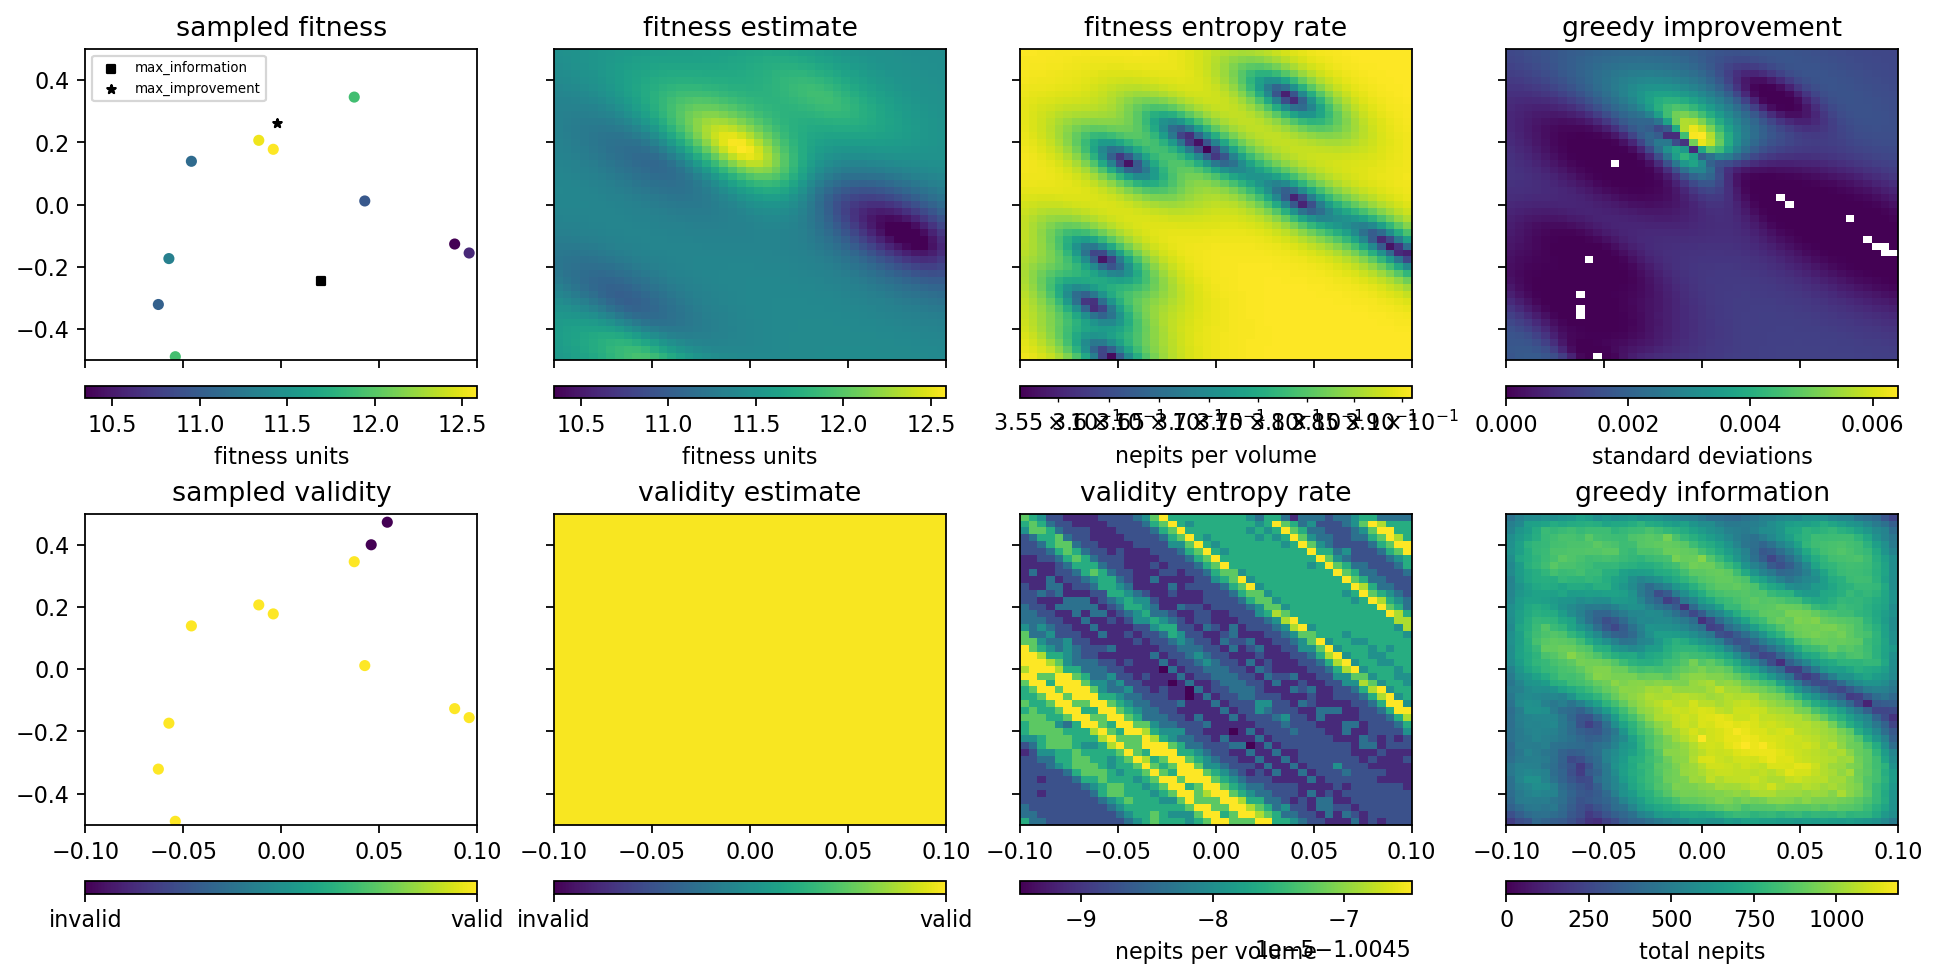

In [4]:
gpo.plot_state(gridded=True)

We can also plot the cumulative maximum fitness over time:

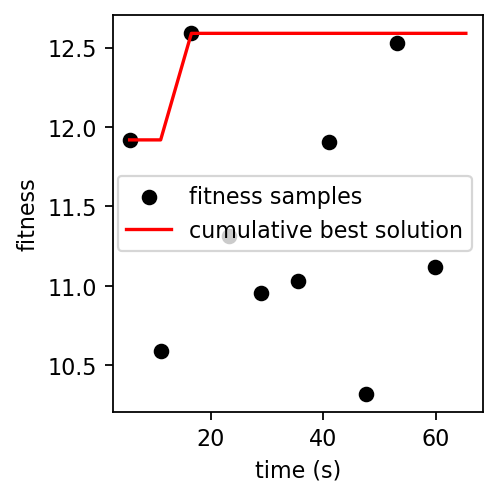

In [5]:
gpo.plot_fitness()